In [24]:
import pyautogui # contienen funciones que automatizan los movimientos del puntero y de las entradas del teclado 
import time
import numpy as np

# Generación de los archivos .sim 

In [3]:
time.sleep(3)
tini=time.time()
#listac = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1280, 1360, 1440, 1520, 1600, 1680, 1760, 1840, 1920, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4200, 4400, 4600, 4800, 5000]
listac = [20,40,60,80,100,200,300,400,500,600,800,1000,1200,1500,1750,2000]
for thickness in listac: 
    name='Thin'
    tt=0.2
    pyautogui.moveTo(243,54,duration=tt,tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(776,177,duration=tt,tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.write(str(thickness),interval=0.1)
    pyautogui.press('enter')
    pyautogui.press('enter')
    pyautogui.moveTo(15,30,duration=tt,tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(30,120,duration=tt,tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.write(f'TiN_{name}_10_to_30KV_{thickness}_nm',interval=0.1)
    pyautogui.press('enter')
    print(f'está listo el archivo .sim de {thickness}')
tfini=time.time()
print(f'Done!, la ejecución tardó {tfini-tini} segundos, i.e {(tfini-tini)/60} min ')

está listo el archivo .sim de 20
está listo el archivo .sim de 40
está listo el archivo .sim de 60
está listo el archivo .sim de 80
está listo el archivo .sim de 100
está listo el archivo .sim de 200
está listo el archivo .sim de 300
está listo el archivo .sim de 400
está listo el archivo .sim de 500
está listo el archivo .sim de 600
está listo el archivo .sim de 800
está listo el archivo .sim de 1000
está listo el archivo .sim de 1200
está listo el archivo .sim de 1500
está listo el archivo .sim de 1750
está listo el archivo .sim de 2000
Done!, la ejecución tardó 95.84017014503479 segundos, i.e 1.5973361690839132 min 


# Generación de archivos .dat

In [5]:
import pyautogui
import time
import os 
import pandas as pd 
tiniT=time.time()

path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\TiN\\TiN thin'
files=os.listdir(path)
#encuentra la ruta
files_cas = [f for f in files if f[-4:] == '.cas']
#toma solo los archivos terminados en .cas
daux={}
total=[]
for file in files_cas:
    newstr = ''.join((ch if ch in '0123456789-e' else ' ') for ch in file)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    daux['name']=file
    daux['thickness']=listOfNumbers[2]
    total.append(daux)
    daux={}
from operator import itemgetter
total.sort(key=itemgetter('thickness')) # ordena los diccionarios de total de menor a mayor thickness
##ABRIR CASINO_v2
pyautogui.FAILSAFE = True # si se desplaza el puntero a la esquina superior izquierda el programa deja de ejecutarse
for index in total: 
    name=index['name']
    thickness=index['thickness']
    tt=0.1
    time.sleep(2)#tiempo de espera mientras se abre la simulacion .cas #crítico
    #movimiento del puntero dentro del software ´para abrir 
    pyautogui.moveTo(15,28, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(15,73,duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    time.sleep(1)
    pyautogui.write(name)
    pyautogui.press('enter')
    print(f'el archivo {name} ha sido abierto!')
    t0=time.time()
    th=40
    x,y=8,80
    xs1=0
    ys1=0
    ys2=0
    time.sleep(5)# tiempo mientras se abre el archivo .cas
    for energy in [10,15,20,25,30]:
        xs1=37#distancia del
        ys1=51
        ys2=18#distancia entre carpeta y carpeta
        tt=0.1
        pyautogui.moveTo(x, y, duration=tt, tween=pyautogui.easeInOutQuad)
        pyautogui.click()
        pyautogui.move(0,ys1, duration=tt, tween=pyautogui.easeInOutQuad)
        pyautogui.move(xs1,0, duration=tt, tween=pyautogui.easeInOutQuad)
        pyautogui.click()
        ##export
        pyautogui.moveTo(48, 57, duration=tt, tween=pyautogui.easeInOutQuad)
        pyautogui.moveTo(218,57, duration=tt, tween=pyautogui.easeInOutQuad)
        pyautogui.click()
        pyautogui.write(f'Data_TiN_thin_{energy}_KV_{thickness}_nm', interval=tt)
        pyautogui.press('enter')
        pyautogui.moveTo(x, y, duration=tt, tween=pyautogui.easeInOutQuad)
        pyautogui.click()
        pyautogui.moveTo(x, y+ys2, duration=tt, tween=pyautogui.easeInOutQuad)
        y=y+ys2
        x=x
    tf=time.time()
    delta=tf-t0
    print(delta)
    print(f'{name} Done!')
tfinT=time.time()
print(f'Los archivos .dat estan listos, la operación tardo {tfinT-tiniT} segundos, {(tfinT-tiniT)/60} minutos o {(tfinT-tiniT)/3600} horas.')

el archivo TiN_Thin_10_to_30KV_20_nm.cas ha sido abierto!
14.540854454040527
TiN_Thin_10_to_30KV_20_nm.cas Done!
el archivo TiN_Thin_10_to_30KV_40_nm.cas ha sido abierto!
14.628047704696655
TiN_Thin_10_to_30KV_40_nm.cas Done!
el archivo TiN_Thin_10_to_30KV_60_nm.cas ha sido abierto!
14.476966857910156
TiN_Thin_10_to_30KV_60_nm.cas Done!
el archivo TiN_Thin_10_to_30KV_80_nm.cas ha sido abierto!
14.687599897384644
TiN_Thin_10_to_30KV_80_nm.cas Done!
el archivo TiN_Thin_10_to_30KV_100_nm.cas ha sido abierto!
14.71847915649414
TiN_Thin_10_to_30KV_100_nm.cas Done!
el archivo TiN_Thin_10_to_30KV_200_nm.cas ha sido abierto!
14.72469162940979
TiN_Thin_10_to_30KV_200_nm.cas Done!
el archivo TiN_Thin_10_to_30KV_300_nm.cas ha sido abierto!
14.892064332962036
TiN_Thin_10_to_30KV_300_nm.cas Done!
el archivo TiN_Thin_10_to_30KV_400_nm.cas ha sido abierto!
14.638060569763184
TiN_Thin_10_to_30KV_400_nm.cas Done!
el archivo TiN_Thin_10_to_30KV_500_nm.cas ha sido abierto!
14.684569358825684
TiN_Thin_10_

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

# Lectura de los archivos .cas 

In [7]:
import os 
import re #regular expression
import pandas as pd 
import matplotlib.pyplot as plt
path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\TiN\\TiN thin'
files=os.listdir(path)
files_dat =[]
files_dat = [f for f in files if f[-4:] == '.dat']
dunsort=[]
Tika=[]
Nka=[]
Sika=[]
energy=[]
thickness=[]
for s in files_dat:
    newstr = ''.join((ch if ch in '0123456789-e' else ' ') for ch in s)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    energy.append(listOfNumbers[0])
    thickness.append(listOfNumbers[1])
    f = open(path+'\\'+s,'r')
    text = f.read()
    x=re.findall('ABS: (\d+....|\d+|\d+.|\d+..|\d+...)|(Ti|N|Si)',text)
    dunsort.append(x)
    if len(x)==7:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(float(x[6][0]))
    elif len(x)==4:
        try:
            Tika.append(float(x[1][0]))
            Nka.append(float(x[3][0]))
            Sika.append(0.0)
            print(x,listOfNumbers[0],listOfNumbers[1])
        except(ValueError):
            Tika.append(float(x[1][0]))
            Nka.append(0.0)
            Sika.append(0.0)
            print(x,listOfNumbers[0],listOfNumbers[1])
    elif len(x)==5:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(0.0)

dic_data={'Energy':energy,'Thickness':thickness,'Tika':Tika,'Nka':Nka}
df=pd.DataFrame(dic_data)
df.head(30)

,Energy,Thickness,Tika,Nka
0,10,1000,585.931,349.813
1,10,100,234.153,89.508
2,10,200,469.479,221.410
3,10,20,37.116,13.582
4,10,300,566.627,310.154
5,10,400,584.105,340.676
6,10,40,79.127,28.709
7,10,500,584.913,348.766
8,10,600,584.985,349.846
9,10,60,127.388,46.418


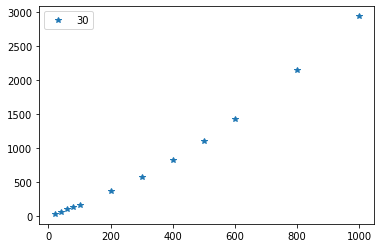

In [32]:
#plt.plot(np.log(df[df.Energy==10].Thickness),np.log(df[df.Energy==10].Tika),'*',label=10)
#plt.plot(np.log(df[df.Energy==15].Thickness),np.log(df[df.Energy==15].Tika),'*',label=15)
#plt.plot(df[df.Energy==20].Thickness,df[df.Energy==20].Tika,'*',label=20)
#plt.plot(df[df.Energy==25].Thickness,df[df.Energy==25].Tika,'*',label=25)
plt.plot(df[df.Energy==30].Thickness,df[df.Energy==30].Tika,'*',label=30)
plt.legend()

In [49]:
from scipy.optimize import curve_fit
xx=df[(df.Energy==30)&(df.Thickness<2000)].Thickness
yy=df[(df.Energy==30)&(df.Thickness<2000)].Tika

In [60]:
def ajuste(x,a,b,c):
    return a*(x/c)**b

1344.9568378994916 1.354172540256692 564.2494636612823
[[-6.34163069e+17  7.85397301e+05 -1.96442718e+17]
 [ 7.85397377e+05  5.64664858e-04  2.43290176e+05]
 [-1.96442718e+17  2.43290100e+05 -6.08514487e+16]]


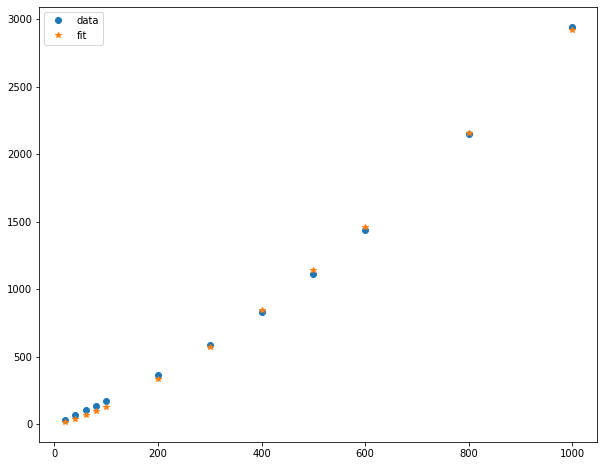

In [61]:
parameters, covariance = curve_fit(ajuste, xx, yy)
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fig = plt.figure(figsize=(10,8))
print(fit_A,fit_B,fit_C)
print(covariance)
fit_y = ajuste(xx, fit_A, fit_B,fit_C)
plt.plot(xx, yy, 'o', label='data')
plt.plot(xx, fit_y, '*', label='fit')

plt.legend()

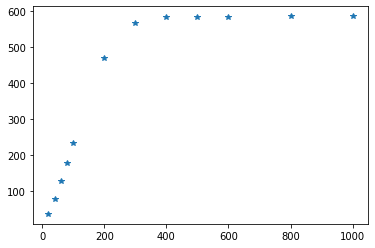

In [27]:
plt.plot((df[df.Energy==10].Thickness),(df[df.Energy==10].Tika),'*',label=10)